<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass5/hpdp/CapKetereh/CapKeterehAssignment5/AUTOMATED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

link dataset = https://github.com/Hafiq02/Datasets/blob/main/covid-vaccination-vs-death_ratio.csv

# COVID vaccination vs. mortality (Future Engineering Assignment 5 )

## Group: CapKetereh

### Group Members

| Name                                     | Matrix Number | Task |
| :---------------------------------------- | :-------------: | ------------- |
| NUR KHUZAIRIE ZAKWAN BIN MOHD ZAMRI | A21EC0112 |  Automated Feature Tools, Feature Selection,  Visualization
| IKMAL BIN KHAIRULEZUAN | A21EC0186 |  Dataset Selection, Loading the Dataset, Visualization
| NUR SHUHADA SAFIAH BINTI AYOB | A21EC0114 |  Exploratory Data Analysis (EDA), Conclusion
| WAN AMIRUL HAFIQ BIN WAN HUZAINI | A21EC0141 | Automated Feature Tools,Feature Selection, Visualization



##1. Dataset Selection

Our dataset is from Kaggle website about <a name="https://www.kaggle.com/datasets/sinakaraji/covid-vaccination-vs-death">COVID vaccination vs. mortality</a>. The COVID-19 outbreak has brought the whole planet to its knees.More over 4.5 million people have died since the writing of this notebook, and the only acceptable way out of the disaster is to vaccinate all parts of society. Despite the fact that the benefits of vaccination have been proved to the world many times, anti-vaccine groups are springing up all over the world. This data set was generated to investigate the impact of coronavirus vaccinations on coronavirus mortality.

<u>Content of the dataset columns</u>
1. country - country name
2. iso_code - iso code for each country
3. date - date that this data belong
4. total_vaccinations - number of all doses of COVID vaccine usage in that country
5. people_vaccinated - number of people who got at least one shot of COVID vaccine
6. people_fully_vaccinated - number of people who got full vaccine shots
7. New_deaths - number of daily new deaths
8. population - 2021 country population
9. ratio - % of vaccinations in that country at that date = people_vaccinated/population * 100

##2. Loading the Dataset

We will use Python libraries like Pandas to load the our dataset into our Colab notebook. We need to mount our google drive as our dataset is store in our google drive. After we mount, we will find the path of our dataset.

In [ ]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "https://raw.githubusercontent.com/Hafiq02/Datasets/main/covid-vaccination-vs-death_ratio.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

# Display the DataFrame
print(df)

       Unnamed: 0      country iso_code        date  total_vaccinations  \
0               0  Afghanistan      AFG  2021-05-11            504502.0   
1               1  Afghanistan      AFG  2021-05-20            547901.0   
2               2  Afghanistan      AFG  2021-05-24            573277.0   
3               3  Afghanistan      AFG  2021-05-26            590454.0   
4               4  Afghanistan      AFG  2021-05-27            593313.0   
...           ...          ...      ...         ...                 ...   
32906       32906     Zimbabwe      ZWE  2022-03-25           8691642.0   
32907       32907     Zimbabwe      ZWE  2022-03-26           8791728.0   
32908       32908     Zimbabwe      ZWE  2022-03-27           8845039.0   
32909       32909     Zimbabwe      ZWE  2022-03-28           8934360.0   
32910       32910     Zimbabwe      ZWE  2022-03-29           9039729.0   

       people_vaccinated  people_fully_vaccinated  New_deaths  population  \
0               448878

##3. Exploratory Data Analysis (EDA)

In this part, we will do data cleansing such as filter missing values, understanding the data types, and getting a sense of the dataset's structure. We include some formula to help identifying an overview for a given data frame, like null persentage for each columns, unique value percentage for each columns and more

In [ ]:
class DfOverview:
    """
        Give an overview for a given data frame,
        like null persentage for each columns,
        unique value percentage for each columns and more
    """

    def __init__(self, df: pd.DataFrame) -> None:
        self.df = df

    def missing_value(self) -> None:
        nullSum = self.df.isna().sum()
        return [col for col in nullSum]

    def percentage(self, list):
        return [str(round(((value / self.df.shape[0]) * 100), 2)) + '%' for value in list]

    def getOverview(self) -> None:

        _columns = [column for column in self.df]
        _count = self.df.count().values
        _unique = [self.df[column].value_counts().shape[0] for column in self.df]
        _missing_values = self.missing_value()

        columns = [
            'Column',
            'count',
            'missing_value_count',
            'Missing_value_percentage',
            'unique_value_count',
            'unique_value_percentage',
            'dtype']
        data = zip(
            _columns,
            _count,
            _missing_values,
            self.percentage(_missing_values),
            _unique,
            self.percentage(_unique),
            self.df.dtypes
        )
        new_df = pd.DataFrame(data=data, columns=columns)
        return new_df

In [ ]:
def show_cols_mixed_dtypes(df):
    mixed_dtypes = {'Column': [], 'Data type': []}
    for col in df.columns:
        dtype = pd.api.types.infer_dtype(df[col])
        if dtype.startswith("mixed"):
            mixed_dtypes['Column'].append(col)
            mixed_dtypes['Data type'].append(dtype)
    if len(mixed_dtypes['Column']) == 0:
        print('None of the columns contain mixed types.')
    else:
        print(pd.DataFrame(mixed_dtypes))

In [ ]:
def percent_missing_values(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

In [ ]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending and remove columns with no missing values
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,0] != 0].sort_values(
    '% of Total Values', ascending=False).round(2)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    if mis_val_table_ren_columns.shape[0] == 0:
        return

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [ ]:
def convert_to_string(df, columns):
    for col in columns:
        df[col] = df[col].astype("string")

In [ ]:
def drop_duplicates(df):
    old = df.shape[0]
    df.drop_duplicates(inplace=True)
    new = df.shape[0]
    count = old - new
    if (count == 0):
        print("No duplicate rows were found.")
    else:
        print(f"{count} duplicate rows were found and removed.")

def plot_dist(df:pd.DataFrame, column:str, color:str='cornflowerblue')->None:
    sns.displot(data=df, x=column, color=color,  kde=False, height=6, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plotly_plot_bar(df, x, y, title=None, width=800, color=['cornflowerblue']):
    if title == None:
        title=f'Distribution of {x}'
    fig = px.bar(df, x=x, y=y, title=title)
    return Image(pio.to_image(fig, format='png', width=width))

def plotly_plot_pie(df, column, title=None, width=800, limit=None):
    a = pd.DataFrame({'count': df.groupby([column]).size()}).reset_index()
    a = a.sort_values("count", ascending=False)
    if limit:
        a.loc[a['count'] < limit, column] = f'Other {column}s'
    if title == None:
        title=f'Distribution of {column}'
    fig = px.pie(a, values='count', names=column, title=title)
    return Image(pio.to_image(fig, format='png', width=width))

In [ ]:
# Getting information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32911 entries, 0 to 32910
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               32911 non-null  int64  
 1   country                  32911 non-null  object 
 2   iso_code                 32911 non-null  object 
 3   date                     32911 non-null  object 
 4   total_vaccinations       32911 non-null  float64
 5   people_vaccinated        32911 non-null  float64
 6   people_fully_vaccinated  32911 non-null  float64
 7   New_deaths               32911 non-null  int64  
 8   population               32911 non-null  float64
 9   ratio                    32911 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 2.5+ MB


Based on the information we have, there are few of the Dtypes are incorrect. So, we will change the Dtype that suitable based on the column we want to modify.

In [ ]:
df = df.astype({
    'total_vaccinations': np.int64,
    'people_vaccinated': np.int64,
    'people_fully_vaccinated': np.int64,
    'population': np.int64,
})

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M')

# Check the data types after the conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32911 entries, 0 to 32910
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               32911 non-null  int64         
 1   country                  32911 non-null  object        
 2   iso_code                 32911 non-null  object        
 3   date                     32911 non-null  datetime64[ns]
 4   total_vaccinations       32911 non-null  int64         
 5   people_vaccinated        32911 non-null  int64         
 6   people_fully_vaccinated  32911 non-null  int64         
 7   New_deaths               32911 non-null  int64         
 8   population               32911 non-null  int64         
 9   ratio                    32911 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 2.5+ MB


Now done with the Dtype for every columns.There are some columns that we can filter out because they are not useful in our analysis. We will exclude the column from our analysis by filtering it.

In [ ]:
# Drop 'Unnamed: 0' and 'iso_code' column
df.drop(['Unnamed: 0', 'iso_code'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32911 entries, 0 to 32910
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   country                  32911 non-null  object        
 1   date                     32911 non-null  datetime64[ns]
 2   total_vaccinations       32911 non-null  int64         
 3   people_vaccinated        32911 non-null  int64         
 4   people_fully_vaccinated  32911 non-null  int64         
 5   New_deaths               32911 non-null  int64         
 6   population               32911 non-null  int64         
 7   ratio                    32911 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 2.0+ MB


Seems good for our dataset. Now, we will find missing value

In [ ]:
#Get overview of our dataset
df_overview = DfOverview(df)
df_overview.getOverview()

,Column,count,missing_value_count,Missing_value_percentage,unique_value_count,unique_value_percentage,dtype
0,country,32911,0,0.0%,197,0.6%,object
1,date,32911,0,0.0%,472,1.43%,datetime64[ns]
2,total_vaccinations,32911,0,0.0%,32538,98.87%,int64
3,people_vaccinated,32911,0,0.0%,32251,97.99%,int64
4,people_fully_vaccinated,32911,0,0.0%,31735,96.43%,int64
5,New_deaths,32911,0,0.0%,1459,4.43%,int64
6,population,32911,0,0.0%,197,0.6%,int64
7,ratio,32911,0,0.0%,32369,98.35%,float64


In [ ]:
# Find percentage of missing value in our dataset
percent_missing_values(df)

The dataset contains 0.0 % missing values.


In [ ]:
# Find missing value by columns
missing_values_table(df)

Your selected dataframe has 8 columns.
There are 0 columns that have missing values.


From our function call, we detect there is no missing value in our dataset. So we done for the data cleansing in our dataset :)



In [ ]:
print(df)

           country       date  total_vaccinations  people_vaccinated  \
0      Afghanistan 2021-05-11              504502             448878   
1      Afghanistan 2021-05-20              547901             470341   
2      Afghanistan 2021-05-24              573277             476367   
3      Afghanistan 2021-05-26              590454             479372   
4      Afghanistan 2021-05-27              593313             479574   
...            ...        ...                 ...                ...   
32906     Zimbabwe 2022-03-25             8691642            4814582   
32907     Zimbabwe 2022-03-26             8791728            4886242   
32908     Zimbabwe 2022-03-27             8845039            4918147   
32909     Zimbabwe 2022-03-28             8934360            4975433   
32910     Zimbabwe 2022-03-29             9039729            5053114   

       people_fully_vaccinated  New_deaths  population      ratio  
0                        55624          12    40374668   1.111781  

In [ ]:
df

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,Afghanistan,2021-05-11,504502,448878,55624,12,40374668,1.111781
1,Afghanistan,2021-05-20,547901,470341,77560,10,40374668,1.164941
2,Afghanistan,2021-05-24,573277,476367,96910,10,40374668,1.179866
3,Afghanistan,2021-05-26,590454,479372,111082,19,40374668,1.187309
4,Afghanistan,2021-05-27,593313,479574,113739,14,40374668,1.187809
...,...,...,...,...,...,...,...,...
32906,Zimbabwe,2022-03-25,8691642,4814582,3473523,2,15229891,31.612715
32907,Zimbabwe,2022-03-26,8791728,4886242,3487962,2,15229891,32.083237
32908,Zimbabwe,2022-03-27,8845039,4918147,3493763,1,15229891,32.292726
32909,Zimbabwe,2022-03-28,8934360,4975433,3501493,1,15229891,32.668868


##4. AUTOMATED FEATURE ENGINEERING TOOLS

###Automated Feature ENGINEERING Tools 1 -**Featuretools**

Featuretools is a Python library specifically designed for automated feature engineering.
- It streamlines the process of creating relevant and meaningful features from raw datasets by automating the feature engineering workflow.

- It adopts an entity-relationship modeling paradigm where users define entities (tables) and their relationships in the dataset.

- Featuretools utilizes Deep Feature Synthesis, a technique that generates new features by stacking, combining, and transforming existing ones.







Install the most recent version of the 'featuretools' library in your Python environment. This library is intended for automating the process of feature engineering.

In [ ]:
!pip install -U featuretools

 Setting up the environment for using the featuretools library while avoiding the display of warning messages from panda

In [ ]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# featuretools for automated feature engineering
import featuretools as ft

# matplotlit and seaborn for visualizations
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

Creating an empty EntitySet with the identifier 'vaccination_data', and  then we can add tables (entities) to this EntitySet

In [ ]:
# Create an EntitySet
es = ft.EntitySet(id='vaccination_data')


Create a new DataFrame (unique_countries) containing unique values from the "country" column of the original DataFrame (df).

In [ ]:
unique_countries = pd.DataFrame(df.country.unique(), columns=["unique_countries"])

Create 'vaccinations' entity from the original dataframe and also Adding another DataFrame named 'unique_countries' to the existing EntitySet (es) that we had already created above.

In [ ]:
# Create 'vaccinations' entity from the original dataframe
es = es.add_dataframe(dataframe=df,
                      dataframe_name='vaccinations',
                      index='unique_countries'  # Assuming 'index' is the index column
                    )  # Assuming 'date' is the time index column

es = es.add_dataframe(  dataframe=unique_countries,
                      dataframe_name='unique_countries',
                        )

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Assuming 'df' is your pandas DataFrame containing the dataset
# Assuming 'unique_countries' is the DataFrame containing unique country names

# Create an EntitySet
es = ft.EntitySet(id='vaccination_data')

unique_countries = pd.DataFrame(df.country.unique(), columns=["unique_countries"])

# Create 'vaccinations' entity from the original dataframe
es = es.add_dataframe(dataframe=df,
                      dataframe_name='vaccinations',
                      index='unique_countries'  # Assuming 'index' is the index column
                    )  # Assuming 'date' is the time index column

es = es.add_dataframe(  dataframe=unique_countries,
                      dataframe_name='unique_countries',
                        )


print to see entityset

In [ ]:
print(es)


Entityset: vaccination_data
  DataFrames:
    vaccinations [Rows: 32911, Columns: 9]
    unique_countries [Rows: 197, Columns: 1]
  Relationships:
    No relationships


Establishing the relationship between 'vaccinations' and 'unique_countries' entity in the EntitySet

In [ ]:

# Establish a relationship between 'vaccinations' and 'unique_countries'
es.add_relationship("unique_countries", "unique_countries", "vaccinations", "country")


Entityset: vaccination_data
  DataFrames:
    vaccinations [Rows: 32911, Columns: 9]
    unique_countries [Rows: 197, Columns: 1]
  Relationships:
    vaccinations.country -> unique_countries.unique_countries

Perform the "Deep Feature Synthesis" function from the "featuretools" library to get feature engineering on the entity set that we had created.

In [ ]:
# Perform deep feature synthesis without specifying primitives
features, feature_names = ft.dfs(entityset=es, target_dataframe_name='unique_countries',  max_depth = 1)

Checking the head data

In [ ]:
features.head(10)

,COUNT(vaccinations),MAX(vaccinations.New_deaths),MAX(vaccinations.people_fully_vaccinated),MAX(vaccinations.people_vaccinated),MAX(vaccinations.population),MAX(vaccinations.ratio),MAX(vaccinations.total_vaccinations),MEAN(vaccinations.New_deaths),MEAN(vaccinations.people_fully_vaccinated),MEAN(vaccinations.people_vaccinated),...,STD(vaccinations.people_vaccinated),STD(vaccinations.population),STD(vaccinations.ratio),STD(vaccinations.total_vaccinations),SUM(vaccinations.New_deaths),SUM(vaccinations.people_fully_vaccinated),SUM(vaccinations.people_vaccinated),SUM(vaccinations.population),SUM(vaccinations.ratio),SUM(vaccinations.total_vaccinations)
unique_countries,,,,,,,,,,,,,,,,,,,,,
Afghanistan,36,86.0,4420127.0,5082824.0,40374668.0,12.589141,5751015.0,22.055556,2.158799e+06,2.671868e+06,...,2.035009e+06,0.0,5.040311,2.249036e+06,794.0,7.771675e+07,9.618724e+07,1.453488e+09,238.236619,1.099805e+08
Albania,184,18.0,1215199.0,1278902.0,2869700.0,44.565704,2754244.0,3.570652,6.686691e+05,8.151295e+05,...,2.870145e+05,0.0,10.001551,6.425136e+05,657.0,1.230351e+08,1.499838e+08,5.280248e+08,5226.463637,2.794868e+08
Algeria,20,34.0,6110712.0,7461932.0,45061896.0,16.559294,13704895.0,7.900000,4.934819e+06,6.506522e+06,...,9.227060e+05,0.0,2.047641,2.154460e+06,158.0,9.869638e+07,1.301304e+08,9.012379e+08,288.781555,2.288814e+08
Andorra,31,2.0,53367.0,57817.0,77355.0,74.742421,151997.0,0.096774,2.954023e+04,4.021432e+04,...,1.827014e+04,0.0,23.618560,4.763816e+04,3.0,9.157470e+05,1.246644e+06,2.398005e+06,1611.588133,2.378178e+06
Angola,53,18.0,5993792.0,11235059.0,34566172.0,32.503047,17535411.0,4.113208,2.285445e+06,4.685579e+06,...,3.783527e+06,0.0,10.945750,5.751044e+06,218.0,1.211286e+08,2.483357e+08,1.832007e+09,718.435602,3.714008e+08
Anguilla,37,1.0,9624.0,10572.0,15117.0,69.934511,22714.0,0.027027,8.326892e+03,9.700243e+03,...,7.972779e+02,0.0,5.274049,3.419519e+03,1.0,3.080950e+05,3.589090e+05,5.593290e+05,2374.207845,7.024830e+05
Antigua and Barbuda,77,2.0,61550.0,63836.0,99162.0,64.375466,125386.0,0.142857,3.734391e+04,4.596616e+04,...,1.126041e+04,0.0,11.355571,2.608185e+04,11.0,2.875481e+06,3.539394e+06,7.635474e+06,3569.304774,6.414875e+06
Argentina,456,926.0,36924451.0,40907186.0,45847428.0,89.224604,96504666.0,176.660088,1.559108e+07,2.230846e+07,...,1.532438e+07,0.0,33.424730,3.360824e+07,80557.0,7.109533e+09,1.017266e+10,2.090643e+10,22188.069477,1.867895e+10
Armenia,35,44.0,948778.0,1113472.0,2970929.0,37.478917,2088962.0,12.800000,3.765387e+05,5.576641e+05,...,3.862881e+05,0.0,13.002268,7.115016e+05,448.0,1.317885e+07,1.951824e+07,1.039825e+08,656.974367,3.279752e+07


showing all the features names generated

In [ ]:
feature_names

[<Feature: COUNT(vaccinations)>,
 <Feature: MAX(vaccinations.New_deaths)>,
 <Feature: MAX(vaccinations.people_fully_vaccinated)>,
 <Feature: MAX(vaccinations.people_vaccinated)>,
 <Feature: MAX(vaccinations.population)>,
 <Feature: MAX(vaccinations.ratio)>,
 <Feature: MAX(vaccinations.total_vaccinations)>,
 <Feature: MEAN(vaccinations.New_deaths)>,
 <Feature: MEAN(vaccinations.people_fully_vaccinated)>,
 <Feature: MEAN(vaccinations.people_vaccinated)>,
 <Feature: MEAN(vaccinations.population)>,
 <Feature: MEAN(vaccinations.ratio)>,
 <Feature: MEAN(vaccinations.total_vaccinations)>,
 <Feature: MIN(vaccinations.New_deaths)>,
 <Feature: MIN(vaccinations.people_fully_vaccinated)>,
 <Feature: MIN(vaccinations.people_vaccinated)>,
 <Feature: MIN(vaccinations.population)>,
 <Feature: MIN(vaccinations.ratio)>,
 <Feature: MIN(vaccinations.total_vaccinations)>,
 <Feature: SKEW(vaccinations.New_deaths)>,
 <Feature: SKEW(vaccinations.people_fully_vaccinated)>,
 <Feature: SKEW(vaccinations.people_v

showing all the features collumns

In [ ]:
features.columns

Index(['COUNT(vaccinations)', 'MAX(vaccinations.New_deaths)',
       'MAX(vaccinations.people_fully_vaccinated)',
       'MAX(vaccinations.people_vaccinated)', 'MAX(vaccinations.population)',
       'MAX(vaccinations.ratio)', 'MAX(vaccinations.total_vaccinations)',
       'MEAN(vaccinations.New_deaths)',
       'MEAN(vaccinations.people_fully_vaccinated)',
       'MEAN(vaccinations.people_vaccinated)', 'MEAN(vaccinations.population)',
       'MEAN(vaccinations.ratio)', 'MEAN(vaccinations.total_vaccinations)',
       'MIN(vaccinations.New_deaths)',
       'MIN(vaccinations.people_fully_vaccinated)',
       'MIN(vaccinations.people_vaccinated)', 'MIN(vaccinations.population)',
       'MIN(vaccinations.ratio)', 'MIN(vaccinations.total_vaccinations)',
       'SKEW(vaccinations.New_deaths)',
       'SKEW(vaccinations.people_fully_vaccinated)',
       'SKEW(vaccinations.people_vaccinated)', 'SKEW(vaccinations.population)',
       'SKEW(vaccinations.ratio)', 'SKEW(vaccinations.total_vaccinati

###Automated Feature Tools 2 -**FeatureEngine**

The Feature Engine library provides tools and utilities to handle various aspects of feature engineering, such as handling missing data, encoding categorical variables, scaling numerical features, and more. It aims to simplify and streamline the feature engineering process, making it easier for data scientists and machine learning practitioners to prepare their data for modeling.

Install the library for feature engine


In [ ]:
!pip install feature-engine

 Setting up the environment for using the featuretools library while avoiding the display of warning messages from panda

In [ ]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# matplotlit and seaborn for visualizations
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

In this part we will use one of the "*feature engine*" which is set null value into mean. We can simply do it as follow:

In [ ]:
import pandas as pd
from feature_engine.imputation import MeanMedianImputer


# Check for missing values
print(df.isnull().sum())

# Create a copy of the original dataset
df_original = df.copy()

# 1. Imputation of Missing Data using Mean
imputer = MeanMedianImputer(imputation_method='mean', variables=['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'New_deaths'])
df = imputer.fit_transform(df)

unique_countries           0
country                    0
date                       0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
New_deaths                 0
population                 0
ratio                      0
dtype: int64


But as we can see there is no value need to be transformed as there is no null value for the dataset. We create a copy of the dataset purposely for the next feature which is labelling data as rare if the data only appear below or equal than 0.01% for the entire dataset. We will use country column for this part

In [ ]:
from feature_engine.encoding import RareLabelEncoder
# 2. Categorical Encoding to handle rare categories (assuming 'country' is a categorical feature)
encoder = RareLabelEncoder(tol=0.01, n_categories=4, variables=['country'])
df = encoder.fit_transform(df)

# Create a new column that represents the old column for countries
df['country_original'] = df_original['country']

# Now, your dataset has undergone automated imputation and categorical encoding
df

,unique_countries,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio,country_original
0,0,Rare,2021-05-11,504502,448878,55624,12,40374668,1.111781,Afghanistan
1,1,Rare,2021-05-20,547901,470341,77560,10,40374668,1.164941,Afghanistan
2,2,Rare,2021-05-24,573277,476367,96910,10,40374668,1.179866,Afghanistan
3,3,Rare,2021-05-26,590454,479372,111082,19,40374668,1.187309,Afghanistan
4,4,Rare,2021-05-27,593313,479574,113739,14,40374668,1.187809,Afghanistan
...,...,...,...,...,...,...,...,...,...,...
32906,32906,Zimbabwe,2022-03-25,8691642,4814582,3473523,2,15229891,31.612715,Zimbabwe
32907,32907,Zimbabwe,2022-03-26,8791728,4886242,3487962,2,15229891,32.083237,Zimbabwe
32908,32908,Zimbabwe,2022-03-27,8845039,4918147,3493763,1,15229891,32.292726,Zimbabwe
32909,32909,Zimbabwe,2022-03-28,8934360,4975433,3501493,1,15229891,32.668868,Zimbabwe


As we can see that there is now new column called country_original which represents the original name of the country. Some of the data in country has changed to Rare. It means that it only appears <=0.01% times for the entire dataset

##5. FEATURE SELECTION

Feature selection is the process of choosing a subset of relevant features (variables, attributes) from the available set of features in a dataset. Its primary goal is to improve model performance, reduce overfitting, and enhance computational efficiency by eliminating irrelevant, redundant, or less informative features.

**After** rechecking the features generated by **Featuretools**, we have identified four crucial features that will contribute significantly to our understanding and analysis of the dataset


- **MAX(vaccinations.New_deaths):** This feature captures the maximum number of new deaths reported in a given timeframe. Understanding the maximum value is crucial for assessing the worst-case scenario or the highest impact at a particular point in time, which is vital for public health monitoring or policy-making.

- **MEAN(vaccinations.total_vaccinations):** The mean value of total vaccinations gives an average count of vaccinations administered, providing an overall picture of vaccination rates across different time periods. It offers insight into the general trend and pace of the vaccination campaign.

- **SUM(vaccinations.people_vaccinated):** The total sum of people vaccinated indicates the cumulative count of individuals who have received at least one vaccine dose. This metric is crucial in understanding the overall progress of vaccination efforts and assessing the coverage of the vaccination campaign.

- **STD(vaccinations.people_fully_vaccinated):** The standard deviation of people fully vaccinated measures the variability or dispersion in the count of individuals who have received the complete vaccine dosage. A higher standard deviation might indicate fluctuating rates of completion in the vaccination process or disparities in the rollout.



In [ ]:
# Specifying the features that we want to display
selected_columns = ['MAX(vaccinations.New_deaths)', 'MEAN(vaccinations.total_vaccinations)', 'SUM(vaccinations.people_vaccinated)', 'STD(vaccinations.people_fully_vaccinated)']

# Creating a new dataframe with only the desired columns
selected_columns_df = features[selected_columns]

# Displaying the new dataframe
print(selected_columns_df)

                   MAX(vaccinations.New_deaths)  \
unique_countries                                  
Afghanistan                                86.0   
Albania                                    18.0   
Algeria                                    34.0   
Andorra                                     2.0   
Angola                                     18.0   
...                                         ...   
Viet Nam                                  804.0   
Wallis and Futuna                           2.0   
Yemen                                      10.0   
Zambia                                     72.0   
Zimbabwe                                  107.0   

                   MEAN(vaccinations.total_vaccinations)  \
unique_countries                                           
Afghanistan                                 3.055013e+06   
Albania                                     1.518950e+06   
Algeria                                     1.144407e+07   
Andorra                             

##6. Visualization

Create bar chart to show top 10 countries with the highest maximum new deaths from the 'vaccinations' dataset to compare the maximum new deaths across different countries. Helps in identifying which countries experienced the highest maximum number of new deaths during the analyzed period.

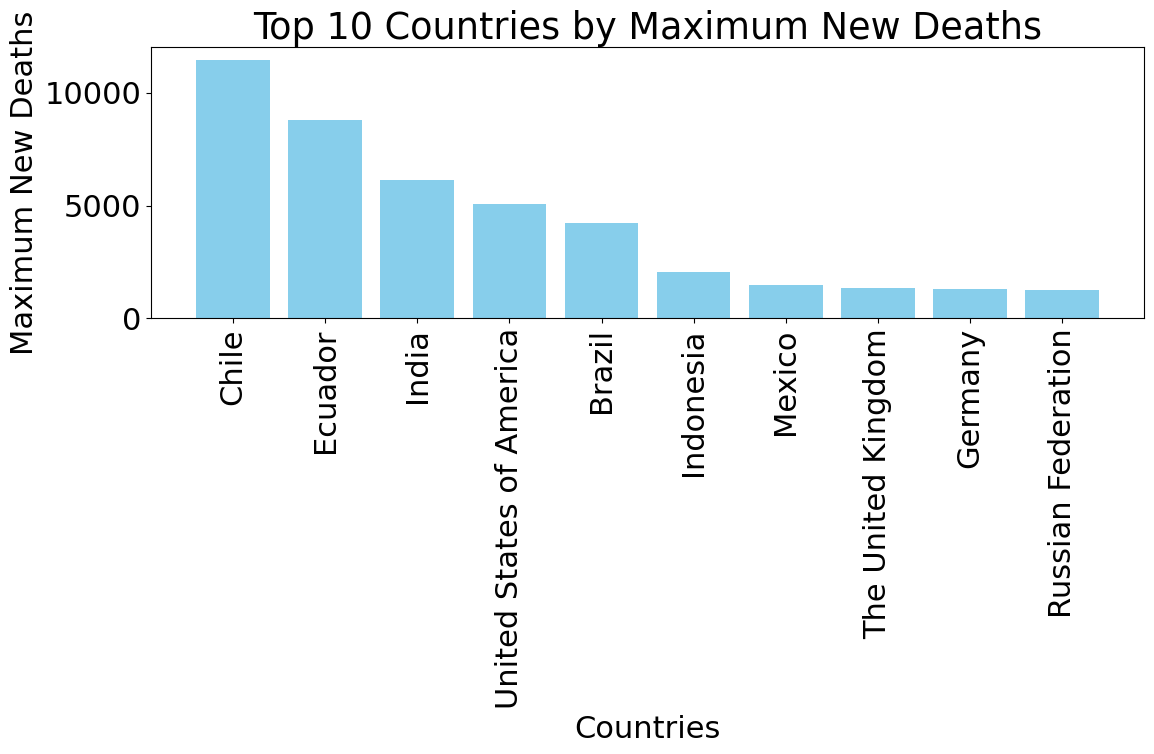

In [ ]:
# Get the top 10 countries based on 'MAX(vaccinations.New_deaths)'
top_10_countries = features['MAX(vaccinations.New_deaths)'].nlargest(10)

# Plotting a bar chart for top 10 countries
plt.figure(figsize=(12, 8))
plt.bar(top_10_countries.index, top_10_countries.values, color='skyblue')
plt.xlabel('Countries')
plt.ylabel('Maximum New Deaths')
plt.title('Top 10 Countries by Maximum New Deaths')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Create a bar chart of  top 10 countries based on the mean of total vaccinations

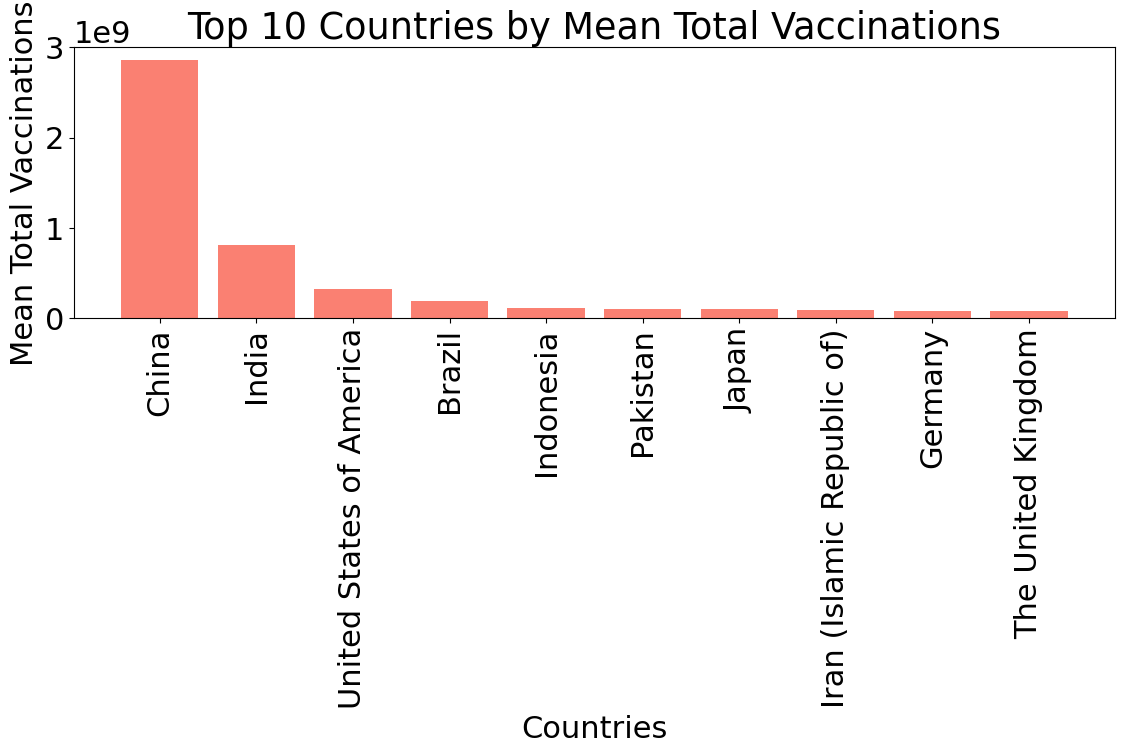

In [ ]:
# Get the mean of total vaccinations for each country
mean_total_vaccinations = features['MEAN(vaccinations.total_vaccinations)']

# Get the top 10 countries based on mean total vaccinations
top_10_total_vaccinations = mean_total_vaccinations.nlargest(10)

# Plotting a bar chart for top 10 countries by mean total vaccinations
plt.figure(figsize=(12, 8))
plt.bar(top_10_total_vaccinations.index, top_10_total_vaccinations.values, color='salmon')
plt.xlabel('Countries')
plt.ylabel('Mean Total Vaccinations')
plt.title('Top 10 Countries by Mean Total Vaccinations')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


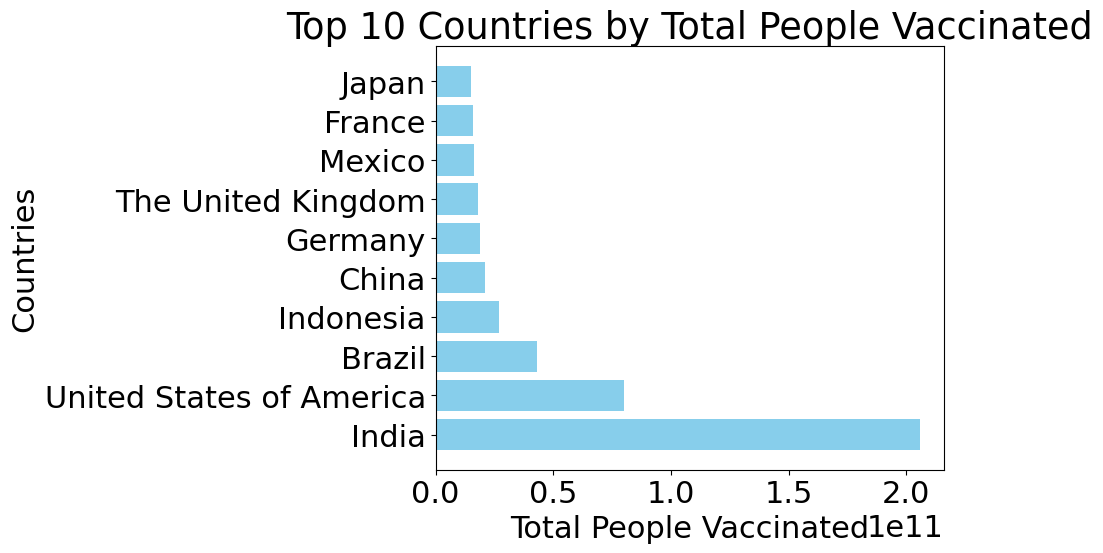

In [ ]:
import matplotlib.pyplot as plt


top_10_people_vaccinated = features['SUM(vaccinations.people_vaccinated)'].nlargest(10)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_people_vaccinated.index, top_10_people_vaccinated.values, color='skyblue')

# Customize the plot
plt.xlabel('Total People Vaccinated')
plt.ylabel('Countries')
plt.title('Top 10 Countries by Total People Vaccinated')
plt.tight_layout()

# Show the plot
plt.show()


##7. Conclusion
**Featuretools:**

**Purpose:** Featuretools is like a wizard for creating features in your data. It's built to automatically whip up new features, especially when your data is scattered across different tables and they're all connected like pieces of a puzzle.

**Strengths:**
- It does the heavy lifting by automatically creating features based on the relationships hiding in your data.
- Works wonders when your data is spread out in multiple tables, and there are interesting connections between them.

**Use Cases:**
- Picture it as your go-to tool for projects where entities (like customers, transactions, or time-series data) are dancing with complex relationships.
- Saves the day when doing feature engineering by hand feels like a daunting task.

**Feature Engine:**

**Purpose:** Feature Engine is more like a toolbox for all things feature engineering. It offers tools for various tasks, from fixing missing data to transforming variables. It's not just about automation; it covers a wide range of feature-related chores.

**Strengths:**
- A versatile set of tools for feature engineering, handling everything from missing data to variable transformations.
- It's not just about creating features; it also preps your data for the ML catwalk.

**Use Cases:**
- Perfect for scenarios where you want to roll up your sleeves and perform a variety of feature engineering tasks manually or in a controlled way.
- Ideal for projects needing traditional feature engineering techniques, not just automated feature creation.

**In the end:**

- If you're on a quest for automatically conjuring up features, especially in the realm of complex relationships between entities, Featuretools is your magical wand.
- If your feature engineering journey requires a broader toolkit, covering tasks beyond automation, Feature Engine is your trusty Swiss army knife.